In [1]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout
from tensorflow.keras.optimizers import SGD
import random
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

In [2]:
import os
os.environ['CUDA _VISIBLE DEVICES']='-1'

In [3]:
x_train=np.loadtxt('input.csv', delimiter=',')
y_train=np.loadtxt('labels.csv', delimiter=',')

In [4]:
x_test=np.loadtxt('input_test.csv', delimiter=',')
y_test=np.loadtxt('labels_test.csv', delimiter=',')

In [5]:
x_train=x_train.reshape(len(x_train), 100, 100, 3)
y_train=y_train.reshape(len(y_train), 1)

In [6]:
x_test=x_test.reshape(len(x_test), 100, 100, 3)
y_test=y_test.reshape(len(y_test), 1)

In [7]:
x_train=x_train/255.0
x_test=x_test/255.0

In [8]:
print('Shape of X_train:', x_train.shape)
print('Shape of Y_train:', y_train.shape)
print('Shape of X_test:', x_test.shape)
print('Shape of Y_test:', y_test.shape)

Shape of X_train: (2000, 100, 100, 3)
Shape of Y_train: (2000, 1)
Shape of X_test: (400, 100, 100, 3)
Shape of Y_test: (400, 1)


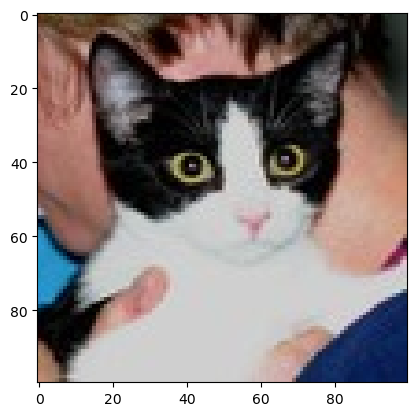

In [9]:
idx=random.randint(0, len(x_train))
plt.imshow(x_train[idx, :])
plt.show()

In [10]:
from tensorflow.keras.layers import BatchNormalization

In [11]:
model=Sequential([
    Conv2D(256, (3, 3), activation='relu', input_shape=(100, 100, 3)),
    BatchNormalization(),
    MaxPooling2D((4, 4)), Conv2D(128, (3, 3), activation='relu'),
    BatchNormalization(),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    BatchNormalization(),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.4),
    Dense(1, activation='sigmoid')
])

In [12]:
opt=SGD(momentum=0.9)
model.compile(optimizer=opt, loss='binary_crossentropy', metrics=['accuracy'])

In [13]:
model.fit(x_train, y_train, epochs=20, batch_size=32, validation_data=(x_test, y_test))

Epoch 1/20
63/63 [==============================] - 148s 2s/step - loss: 0.7886 - accuracy: 0.5470 - val_loss: 0.7204 - val_accuracy: 0.4875
Epoch 2/20
63/63 [==============================] - 140s 2s/step - loss: 0.6525 - accuracy: 0.6335 - val_loss: 0.8462 - val_accuracy: 0.5025
Epoch 3/20
63/63 [==============================] - 126s 2s/step - loss: 0.6105 - accuracy: 0.6690 - val_loss: 0.8689 - val_accuracy: 0.5000
Epoch 4/20
63/63 [==============================] - 131s 2s/step - loss: 0.5800 - accuracy: 0.6915 - val_loss: 0.9709 - val_accuracy: 0.5100
Epoch 5/20
63/63 [==============================] - 127s 2s/step - loss: 0.5299 - accuracy: 0.7270 - val_loss: 0.7635 - val_accuracy: 0.5750
Epoch 6/20
63/63 [==============================] - 145s 2s/step - loss: 0.5068 - accuracy: 0.7420 - val_loss: 0.8101 - val_accuracy: 0.6050
Epoch 7/20
63/63 [==============================] - 125s 2s/step - loss: 0.4482 - accuracy: 0.7865 - val_loss: 0.6729 - val_accuracy: 0.6500
Epoch 8/20
63

In [14]:
model.evaluate(x_test, y_test)

13/13 [==============================] - 4s 337ms/step - loss: 1.0585 - accuracy: 0.7175


[1.058535099029541, 0.7174999713897705]

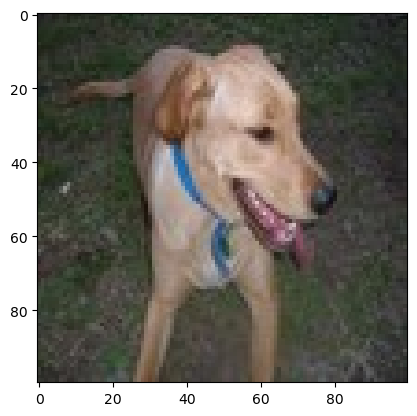

In [15]:
idx2=random.randint(0, len(y_test))
plt.imshow(x_test[idx2, :])
plt.show()

In [16]:
y_pred=model.predict(x_test[idx2, :].reshape(1, 100, 100, 3))
y_pred=y_pred>0.5
if(y_pred==0):
    pred='dog'
else:
    pred='cat'
print('Our model says it is a', pred)
    

1/1 [==============================] - 0s 173ms/step
Our model says it is a dog


In [17]:
score=model.evaluate(x_test, y_test, verbose=0)
print("Test score: ", score[0])
print("Test accuracy: ", score[1])

Test score:  1.058535099029541
Test accuracy:  0.7174999713897705


In [18]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 98, 98, 256)       7168      
                                                                 
 batch_normalization (Batch  (None, 98, 98, 256)       1024      
 Normalization)                                                  
                                                                 
 max_pooling2d (MaxPooling2  (None, 24, 24, 256)       0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 22, 22, 128)       295040    
                                                                 
 batch_normalization_1 (Bat  (None, 22, 22, 128)       512       
 chNormalization)                                                
                                                        

In [19]:
val=model.fit(x_train, y_train, epochs=5, batch_size=30, validation_data=(x_test, y_test))

Epoch 1/5
67/67 [==============================] - 124s 2s/step - loss: 0.0944 - accuracy: 0.9615 - val_loss: 1.2130 - val_accuracy: 0.6725
Epoch 2/5
67/67 [==============================] - 122s 2s/step - loss: 0.0720 - accuracy: 0.9730 - val_loss: 1.0102 - val_accuracy: 0.7125
Epoch 3/5
67/67 [==============================] - 128s 2s/step - loss: 0.0686 - accuracy: 0.9750 - val_loss: 1.1727 - val_accuracy: 0.7325
Epoch 4/5
67/67 [==============================] - 129s 2s/step - loss: 0.0767 - accuracy: 0.9685 - val_loss: 1.1546 - val_accuracy: 0.7500
Epoch 5/5
67/67 [==============================] - 117s 2s/step - loss: 0.0674 - accuracy: 0.9730 - val_loss: 1.1299 - val_accuracy: 0.7225


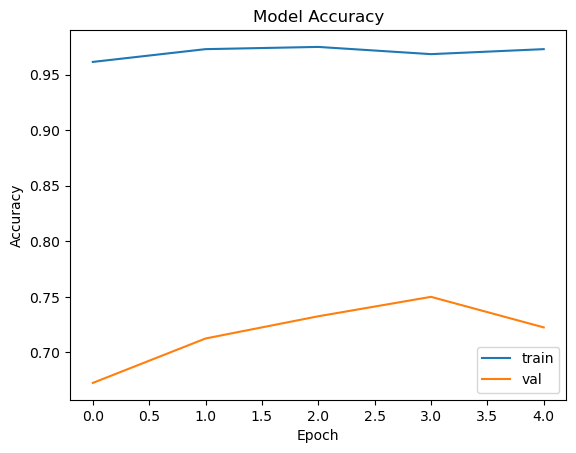

In [20]:
plt.title("Model Accuracy")
plt.ylabel("Accuracy")
plt.xlabel("Epoch")
plt.plot(val.history['accuracy'])
plt.plot(val.history['val_accuracy'])
plt.legend(['train', 'val'])
plt.show()